# Gaussian Process for Event likelihoods

## Preliminary steps

### Loading necessary packages

In [1]:
using Plots
using AugmentedGaussianProcesses
using Distributions

## Creating some random data

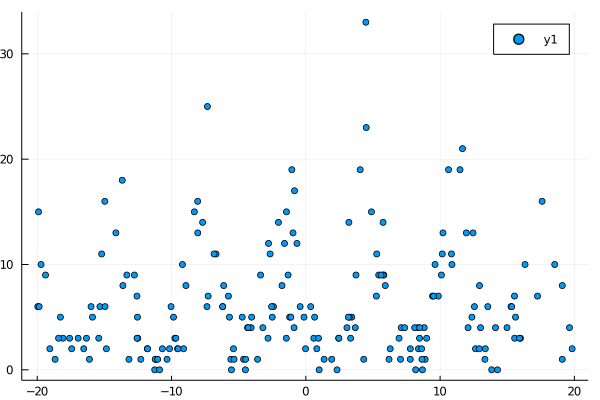

In [2]:
n_data = 200
X = (rand(n_data) .- 0.5) * 40
r = 5.0
Y = rand.(NegativeBinomial.(r, AGP.logistic.(sin.(X))))
scatter(X, Y)

## Run GP model with negative binomial likelihood to learn p

In [3]:
kernel = SqExponentialKernel() ∘ ScaleTransform(1.0)
m_negbinomial = VGP(
    X, Y, kernel, NegBinomialLikelihood(r), AnalyticVI(); optimiser=false, verbose=2
)
@time train!(m_negbinomial, 20)

[ Info: Starting training Variational Gaussian Process with a Negative Binomial Likelihood (r = 5.0) infered by Analytic Variational Inference  with 200 samples, 1 features and n_latent latent GP
Training Progress: 100%|████████████████████████████████| Time: 0:00:02
  iter:  20
  ELBO:  -564.0710813331903
[ Info: Training ended after 20 iterations. Total number of iterations 20
  3.206770 seconds (7.46 M allocations: 475.605 MiB, 98.04% compilation time)


(Variational Gaussian Process with a Negative Binomial Likelihood (r = 5.0) infered by Analytic Variational Inference , (local_vars = (c = [0.19750067080591632, 0.35957302479497966, 0.3711205734589813, 0.47847408644006845, 0.37088743179232525, 0.2591885680766245, 0.1945968292668199, 0.26687730852774466, 0.4348905394459681, 0.2191416554854721  …  0.4006394547557885, 0.18967714044742395, 0.37384924317923, 0.229932240183634, 0.18640671592198713, 0.2007997939871359, 0.23926527377348109, 0.16334689718229595, 0.39578201451312583, 0.21703061604728752], θ = [3.4886673026518213, 4.452133992640612, 3.954713471403346, 4.906743798558545, 2.4717309880378857, 4.972195640425467, 5.482709340459064, 6.461693415135665, 8.860785041901218, 4.980086017098363  …  6.4144292655318145, 3.988050516778117, 6.919595013227264, 3.9824697296421485, 5.484129223760653, 5.979920678426459, 6.469167235406721, 9.478932794856561, 3.455016841125004, 5.478512655830656]), opt_state = (NamedTuple(),), hyperopt_state = (NamedTu

## Running the same model but with a Poisson likelihood

In [4]:
kernel = SqExponentialKernel() ∘ ScaleTransform(1.0)
m_poisson = VGP(
    X, Y, kernel, PoissonLikelihood(r), AnalyticVI(); optimiser=false, verbose=2
)
@time train!(m_poisson, 20)

[ Info: Starting training Variational Gaussian Process with a Poisson Likelihood (λ = 5.0) infered by Analytic Variational Inference  with 200 samples, 1 features and n_latent latent GP
Training Progress: 100%|████████████████████████████████| Time: 0:00:01
  iter:  20
  ELBO:  -672.2705766999454
[ Info: Training ended after 20 iterations. Total number of iterations 20
  2.340240 seconds (4.37 M allocations: 309.138 MiB, 11.65% gc time, 97.23% compilation time)


(Variational Gaussian Process with a Poisson Likelihood (λ = 13.385325664607155) infered by Analytic Variational Inference , (local_vars = (c = [0.34361978616242184, 0.4989666359107837, 0.3142427188443115, 0.6871437361074499, 0.5754148323394663, 0.17148159234557617, 0.29427895570534446, 0.19160409481065419, 0.38366326207284507, 0.1426727812227405  …  0.3424371476246927, 0.1445858139319031, 0.31752444502680793, 0.39880828130036555, 0.2819510837935795, 0.16061768498788065, 0.28343494375473416, 0.18380547494573168, 0.5562490753755261, 0.16102368042323176], θ = [4.799995961853613, 5.906016583247113, 4.327789380669983, 6.644454903108479, 4.1355516467761815, 5.67873489800055, 6.683048681448287, 7.226349074239308, 9.142737665029493, 5.789408175694225  …  6.777272318463215, 4.885360861682516, 7.291778773387852, 5.3757384340334635, 6.669231613669953, 6.878312764481693, 7.570099750780125, 10.498700397692978, 5.018254564470205, 6.333985852663206], γ = [7.6942661233838585, 8.056090155169853, 5.726

Prediction and plot function on a grid
Create a grid and compute prediction on it

In [5]:
function compute_grid(model, n_grid=50)
    mins = -20
    maxs = 20
    x_grid = range(mins, maxs; length=n_grid) # Create a grid
    y_grid, sig_y_grid = proba_y(model, reshape(x_grid, :, 1)) # Predict the mean and variance on the grid
    return y_grid, sig_y_grid, x_grid
end

compute_grid (generic function with 2 methods)

Plot the data as a scatter plot

In [6]:
function plot_data(X, Y)
    return Plots.scatter(X, Y; alpha=0.33, msw=0.0, lab="", size=(800, 500))
end

function plot_model(model, X, Y, title=nothing)
    n_grid = 100
    y_grid, sig_y_grid, x_grid = compute_grid(model, n_grid)
    p = plot_data(X, Y)
    Plots.plot!(
        p,
        x_grid,
        y_grid;
        ribbon=2 * sqrt.(sig_y_grid), # Plot 2 std deviations
        title=title,
        color="red",
        lab="",
        linewidth=3.0,
    )
    return p
end;

## Comparison between the two likelihoods

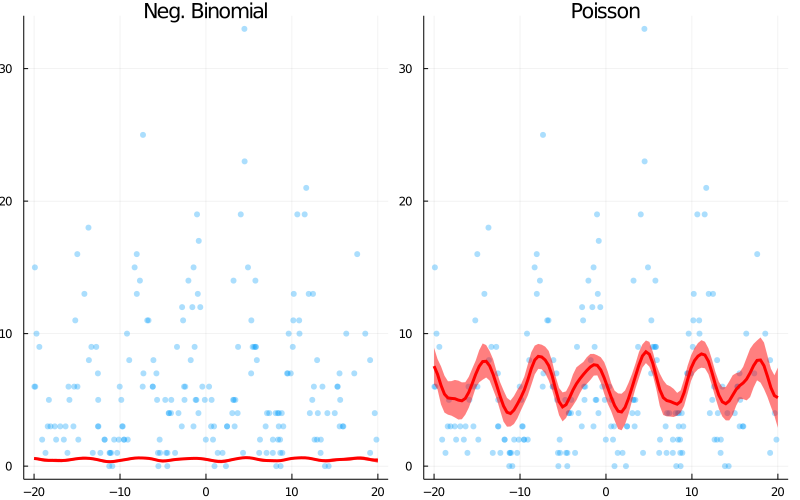

In [7]:
Plots.plot(
    plot_model.(
        [m_negbinomial, m_poisson], Ref(X), Ref(Y), ["Neg. Binomial", "Poisson"]
    )...;
    layout=(1, 2),
)

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*